In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Load Facial Image Datasets

In [ ]:
#Unzip downloaded compressed dataset. Dataset was downloaded from https://ieeexplore.ieee.org/document/840611?arnumber=840611
!ls

sample_data


In [ ]:
!unzip drive/"My Drive"/dataverse_files.zip

Archive:  drive/My Drive/dataverse_files.zip
  inflating: FePh_images.zip         
  inflating: FePh_labels.csv         


In [ ]:
!unzip FePh_images.zip

Archive:  FePh_images.zip
   creating: FePh_images/
  inflating: FePh_images/01August_2011_Monday_heute_default-6.avi_pid0_fn000054-0.png  
  inflating: FePh_images/01August_2011_Monday_heute_default-6.avi_pid0_fn000055-0.png  
  inflating: FePh_images/01August_2011_Monday_heute_default-6.avi_pid0_fn000056-0.png  
  inflating: FePh_images/01August_2011_Monday_heute_default-6.avi_pid0_fn000069-0.png  
  inflating: FePh_images/01August_2011_Monday_heute_default-6.avi_pid0_fn000070-0.png  
  inflating: FePh_images/01August_2011_Monday_heute_default-6.avi_pid0_fn000073-0.png  
  inflating: FePh_images/01December_2011_Thursday_heute_default-3.avi_pid0_fn000012-0.png  
  inflating: FePh_images/01December_2011_Thursday_heute_default-3.avi_pid0_fn000013-0.png  
  inflating: FePh_images/01December_2011_Thursday_heute_default-3.avi_pid0_fn000049-0.png  
  inflating: FePh_images/01December_2011_Thursday_heute_default-3.avi_pid0_fn000051-0.png  
  inflating: FePh_images/01December_2011_Thursday_he

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('FePh_labels.csv')
data

,External ID,Final_labels,Facial_label,Gender
0,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
1,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
2,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
3,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
4,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
...,...,...,...,...
3354,31May_2011_Tuesday_heute_default-14.avi_pid0_f...,none_of_the_above,7,1
3355,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,none_of_the_above,7,1
3356,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,surprise,6,1
3357,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,surprise,6,1


In [ ]:
#We observe that there are 3359 rows of data and 4 columns
data.shape

(3359, 4)

In [ ]:
data.columns

Index(['External ID', 'Final_labels', 'Facial_label', 'Gender'], dtype='object')

In [ ]:
#Check for missing values
data.isnull().sum()

External ID      0
Final_labels    52
Facial_label     1
Gender           0
dtype: int64

In [ ]:
#Drop missing values
data.dropna()

,External ID,Final_labels,Facial_label,Gender
0,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
1,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
2,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
3,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
4,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
...,...,...,...,...
3354,31May_2011_Tuesday_heute_default-14.avi_pid0_f...,none_of_the_above,7,1
3355,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,none_of_the_above,7,1
3356,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,surprise,6,1
3357,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,surprise,6,1


In [ ]:
#I noticed that some rows contain two emotions due to uncertainty therefore we can add it to those with single emotions

for row in data.itertuples():
  try:
    if '/' in row.Final_labels:
      data.at[row.Index, 'Facial_label'] = int(str(row.Facial_label)[0])
      data.at[row.Index, 'Final_labels'] = row.Final_labels.split('/')[0]
  except:
    continue
      
data['Final_labels'].value_counts()


surprise             977
anger                570
none_of_the_above    388
sad                  387
fear                 342
disgust              227
neutral              225
happy                180
None                   4
none of the above      4
surprie                3
Name: Final_labels, dtype: int64

In [ ]:
data[['Final_labels','Facial_label']].value_counts()

Final_labels       Facial_label
surprise           6               814
anger              1               507
none_of_the_above  7               387
sad                5               349
fear               3               308
neutral            0               195
disgust            2               187
happy              4               179
surprise           6               162
anger              2                34
sad                5                30
fear               5                16
neutral            5                14
anger              5                14
disgust            2                13
                   3                11
                   6                10
neutral            4                 9
anger              6                 9
fear               6                 9
                   3                 9
sad                6                 8
disgust            5                 6
anger              3                 6
None               7            

In [ ]:
#We noticed that some of the datasets' facial labels had a mismatch therefore we would map them with correct values
emotion_map = {'neutral':0,'anger':1,'disgust':2,'fear':3,'happy':4,'sad':5,'surprise':6,'none_of_the_above':7}
#We can still merge some similar rows together
data['Final_labels'] = data['Final_labels'].replace({'None':'none_of_the_above','none of the above':'none_of_the_above','surprie':'surprise'})
data['Facial_label'] = data['Final_labels'].map(emotion_map)
data['Final_labels'].value_counts()

surprise             980
anger                570
none_of_the_above    396
sad                  387
fear                 342
disgust              227
neutral              225
happy                180
Name: Final_labels, dtype: int64

In [ ]:
#Confirm everything is in order
data[['Final_labels','Facial_label']].value_counts()

Final_labels       Facial_label
surprise           6.0             980
anger              1.0             570
none_of_the_above  7.0             396
sad                5.0             387
fear               3.0             342
disgust            2.0             227
neutral            0.0             225
happy              4.0             180
dtype: int64

In [ ]:
#Display some images from the dataset to have a better view of the dataset
import matplotlib.pyplot as plt
import numpy as np

#Take 10 random images and plot
ten_random = data.sample(10)
ten_random

,External ID,Final_labels,Facial_label,Gender
2008,18November_2009_Wednesday_tagesschau_default-7...,sad,5.0,1
720,06May_2011_Friday_tagesschau_default-18.avi_pi...,none_of_the_above,7.0,1
1115,10August_2009_Monday_heute_default-3.avi_pid0_...,surprise,6.0,1
2577,24January_2013_Thursday_heute_default-11.avi_p...,anger,1.0,0
712,06May_2010_Thursday_heute_default-8.avi_pid0_f...,surprise,6.0,1
383,03October_2012_Wednesday_tagesschau_default-5....,anger,1.0,1
632,06February_2011_Sunday_tagesschau_default-11.a...,surprise,6.0,1
1110,10August_2009_Monday_heute_default-3.avi_pid0_...,surprise,6.0,1
221,02November_2010_Tuesday_tagesschau_default-3.a...,neutral,0.0,1
2189,20September_2010_Monday_heute_default-5.avi_pi...,surprise,6.0,1


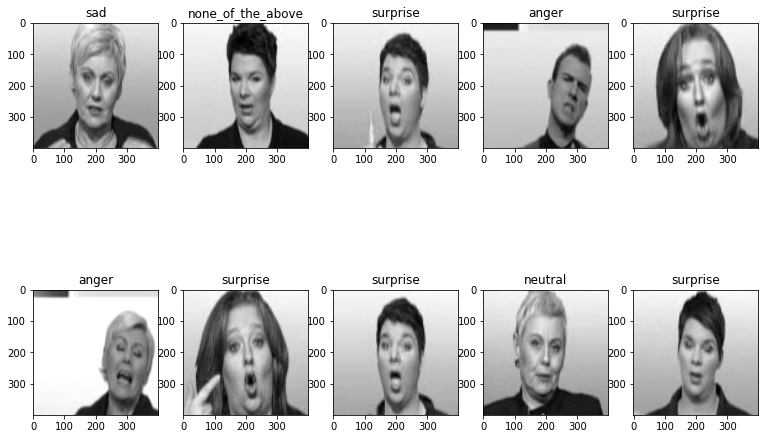

In [ ]:
#Let us now plot the random images extracted to have a view of the data
import cv2 as cv
figs = plt.figure(figsize=(13, 9))
columns = 5
rows = 2

axs = []

for i,im_data in enumerate(ten_random.itertuples()):
  colored_img = cv.imread(f"FePh_images/{im_data._1}")

  #Colored images normally contain noise therefore we need to convert these images to greyscale.
  gray_image = cv.cvtColor(colored_img, cv.COLOR_BGR2GRAY) 

  # create subplot and append to axs
  axs.append( figs.add_subplot(rows, columns, i+1) )
  axs[-1].set_title(im_data.Final_labels)  # set title
  plt.imshow(gray_image,cmap='gray')


plt.show()  # finally, render the plot

In [ ]:
#Since background information attributes to noise. We are going to get rid of this by using Haar cascade classifier to detect faces and cropping the image into 48x48.

def detect_and_resize(img):
  #Get height and width of img
  height,width = img.shape[:2]

  #Identify faces using Haar Cascades
  face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(img, 1.3, 1)
  
  if isinstance(faces, tuple):
    resized_img = cv.resize(img, (48,48))
        
  elif isinstance(faces, np.ndarray):
    for (x,y,w,h) in faces:
      if w * h < (height * width) / 3:
        resized_img = cv.resize(img, (48,48))
      else:
        roi_gray = img[y:y+h, x:x+w]
        resized_img = cv.resize(roi_gray, (48,48))

  return resized_img

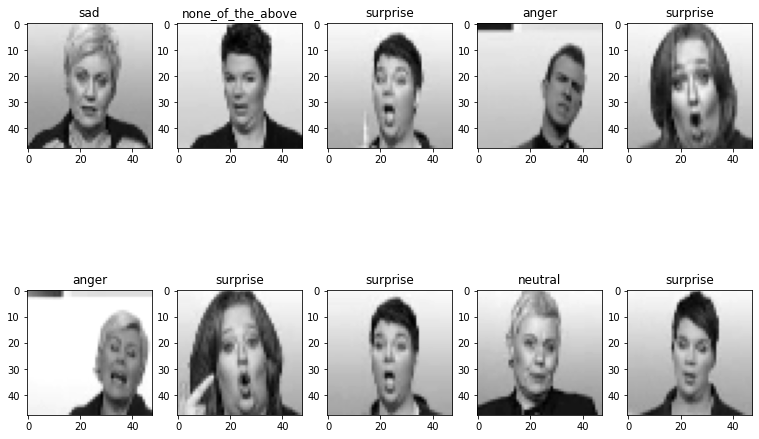

In [ ]:
#Let us test the function on our randomized dataset

axs = []
figs = plt.figure(figsize=(13, 9))
columns = 5
rows = 2

for test_i,test_im_data in enumerate(ten_random.itertuples()):
  colored_img = cv.imread(f"FePh_images/{test_im_data._1}")

  #Colored images normally contain noise therefore we need to convert these images to greyscale.
  gray_image = cv.cvtColor(colored_img, cv.COLOR_BGR2GRAY) 

  resize_img = detect_and_resize(gray_image)

  # create subplot and append to axs
  axs.append( figs.add_subplot(rows, columns, test_i+1) )
  axs[-1].set_title(test_im_data.Final_labels)  # set title
  plt.imshow(resize_img,cmap='gray')


plt.show()  # finally, render the plot

In [ ]:
import os
from keras.preprocessing.image import img_to_array

#Create a training directory
trained_imgs = 'trained_imgs'
os.mkdir(trained_imgs)

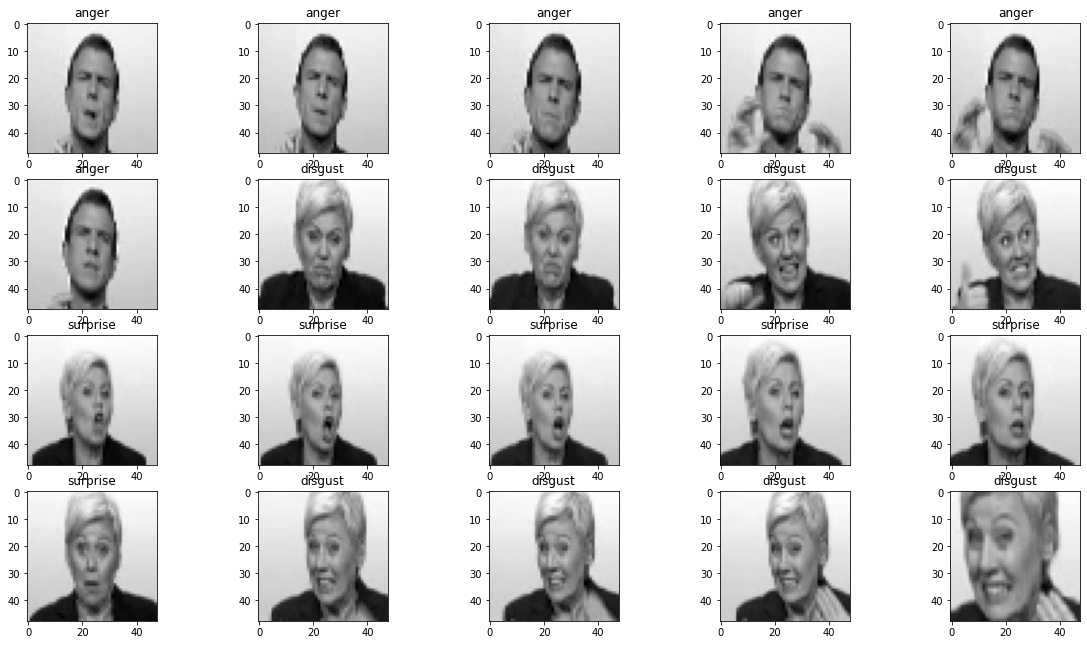

In [ ]:
#We can now apply the function created to our actual dataset
axs = []
figs = plt.figure(figsize=(20, 11))
columns = 5
rows = 4

#Initialize a list containing image arrays and labels
data_array_list = []
labels = []

for actual_i,actual_im_data in enumerate(data.itertuples()):
  try:
    colored_img = cv.imread(f"FePh_images/{actual_im_data._1}")
    #Colored images normally contain noise therefore we need to convert these images to greyscale.
    gray_actual_image = cv.cvtColor(colored_img, cv.COLOR_BGR2GRAY) 

    resize_actual_img = detect_and_resize(gray_actual_image)
    
    #Write to train directory
    cv.imwrite(f"{trained_imgs}/{actual_im_data._1}",resize_actual_img)

    check_list = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0]
    #Append to lists
    
    if actual_im_data.Facial_label in check_list:
      data_array_list.append(img_to_array(resize_actual_img))
      labels.append(int(actual_im_data.Facial_label))


    # create subplot and append to axs
    if actual_i < 20:
      axs.append( figs.add_subplot(rows, columns, actual_i+1) )
      axs[-1].set_title(actual_im_data.Final_labels)  # set title
      plt.imshow(resize_actual_img,cmap='gray')
  except:
    continue
    
  

plt.show()  # finally, render the plot

In [ ]:
#Scale raw pixel intensities range to [0, 1]

data_array_list = np.array(data_array_list, dtype="float") / 255.0
labels = np.array(labels)
print("[Image INFO] data matrix: {:.2f}MB".format(data_array_list.nbytes / (1024 * 1000.0)))
print(data_array_list.shape, labels.shape)

[Image INFO] data matrix: 59.35MB
(3297, 48, 48, 1) (3297,)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
#import machine learning libraries
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator


#Create train and test set. Split into 80-20 where 80% of data is for training and 20% for testing

(trainX, testX, trainY, testY) = train_test_split(data_array_list,labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
input_shape = (48,48,1)# We set our input shape to be 48x48 pixels and since it is greyscale, it has a depth of 1
classes = len(lb.classes_) #Number of classes(facial emotions)

channel_dimension = -1
# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
  input_shape = (depth, height, width)
  channel_dimension = 1

#We set a filter number of 64 since we had an input shape of 48x48 in order not to miss out useful info.
#Relu is used since it allows model learns faster and overcomes vanishing gradient point
model.add(Conv2D(64, (3, 3),padding="same",activation="relu",input_shape=input_shape))

#Batch normalization is applied to avoid internal covariate shift 
#In order to reduce overfitting, we add a dropout layer in order to reduce overfitting
#We made use of Max pooling for translation invariance

model.add(BatchNormalization(axis=channel_dimension))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

#Conv Layer 2
model.add(Conv2D(64, (3, 3),activation="relu",padding="same"))
model.add(BatchNormalization(axis=channel_dimension))

#Conv Layer 3
model.add(Conv2D(64, (3, 3),activation="relu",padding="same"))
model.add(BatchNormalization(axis=channel_dimension))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Conv layer 4
model.add(Conv2D(128, (3, 3),activation="relu", padding="same"))
model.add(BatchNormalization(axis=channel_dimension))

#Conv Layer 5
model.add(Conv2D(128, (3, 3),activation="relu", padding="same"))
model.add(BatchNormalization(axis=channel_dimension))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#FC layer
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# We make use of softmax since it generates a probability distribution over the target classes
model.add(Dense(classes,activation="softmax")) 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
#Model configuration
batch_size = 64
epoch = 50
lr = 1e-3

# Compile the model

#categorical crossentropy is used to determine the difference between prediction and actual target
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(decay= lr/epoch),
              metrics=['accuracy'])

In [ ]:
gen_model = model.fit(trainX,trainY,batch_size=batch_size,validation_data = (testX,testY),epochs=epoch)
gen_model
print('Fitting Complete')

Epoch 1/50
42/42 [==============================] - 26s 622ms/step - loss: 2.6700 - accuracy: 0.2533 - val_loss: 1.9926 - val_accuracy: 0.2894
Epoch 2/50
42/42 [==============================] - 26s 621ms/step - loss: 2.0495 - accuracy: 0.3193 - val_loss: 2.1542 - val_accuracy: 0.2894
Epoch 3/50
42/42 [==============================] - 26s 617ms/step - loss: 1.7866 - accuracy: 0.3891 - val_loss: 2.9522 - val_accuracy: 0.0924
Epoch 4/50
42/42 [==============================] - 26s 614ms/step - loss: 1.6751 - accuracy: 0.4236 - val_loss: 2.8247 - val_accuracy: 0.2894
Epoch 5/50
42/42 [==============================] - 26s 617ms/step - loss: 1.5717 - accuracy: 0.4437 - val_loss: 2.2882 - val_accuracy: 0.1576
Epoch 6/50
42/42 [==============================] - 26s 619ms/step - loss: 1.4794 - accuracy: 0.4755 - val_loss: 2.7488 - val_accuracy: 0.1091
Epoch 7/50
42/42 [==============================] - 27s 647ms/step - loss: 1.3706 - accuracy: 0.5142 - val_loss: 3.6381 - val_accuracy: 0.1076

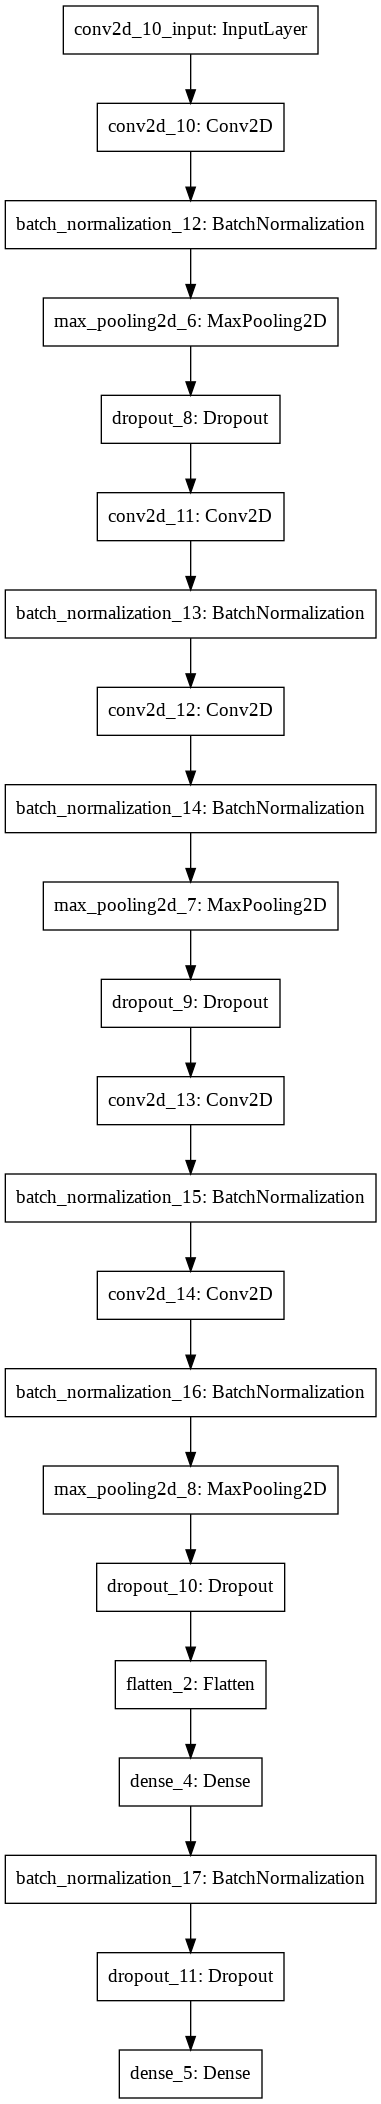

In [ ]:
#Show CNN visualization
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [ ]:
import pickle 

model.save('drive/My Drive/emotion_classifier.model')
f = open("drive/My Drive/lb.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

INFO:tensorflow:Assets written to: drive/My Drive/emotion_classifier.model/assets


In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.3478169441223145 / Test accuracy: 0.7136363387107849


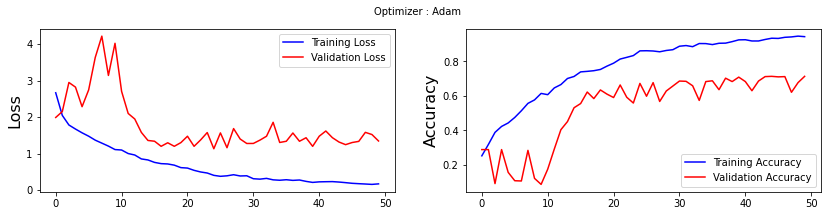

In [ ]:
#Visualized the training loss and accuracy
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(gen_model.history['loss'], color='b', label='Training Loss')
plt.plot(gen_model.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(gen_model.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(gen_model.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

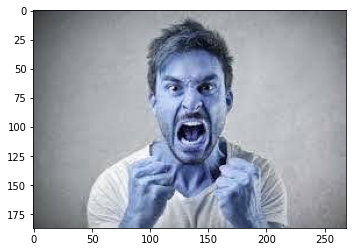

In [ ]:
#Test model on new dataset
import cv2 as cv

test_image = cv.imread('drive/My Drive/angry2.jpg')
plt.imshow(test_image)

In [ ]:
from keras.models import load_model

emotions = {0:'neutral',1:'anger',2:'disgust',3:'fear',4:'happy',5:'sad',6:'surprise',7:'none_of_the_above'}
model = load_model('drive/My Drive/emotion_classifier.model')
gray_image = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)
resize_img = detect_and_resize(gray_image)
final_im = resize_img.astype("float") / 255.0
final_im = img_to_array(final_im)
final_im = np.expand_dims(final_im,axis=0)
prediction = model.predict(final_im)
idx = np.argmax(prediction)
l = lb.classes_[idx]
final_pred = emotions[l]

print(f"Final prediction: {final_pred}")

Final prediction: anger
